In [1]:
import glyco as gl

In [2]:
import logging

In [3]:
df = gl.get_glucose_from_file("data/johan_glucose.csv")
mdf = gl.get_glucose_from_file("data/glucose.csv", skiprows=0)

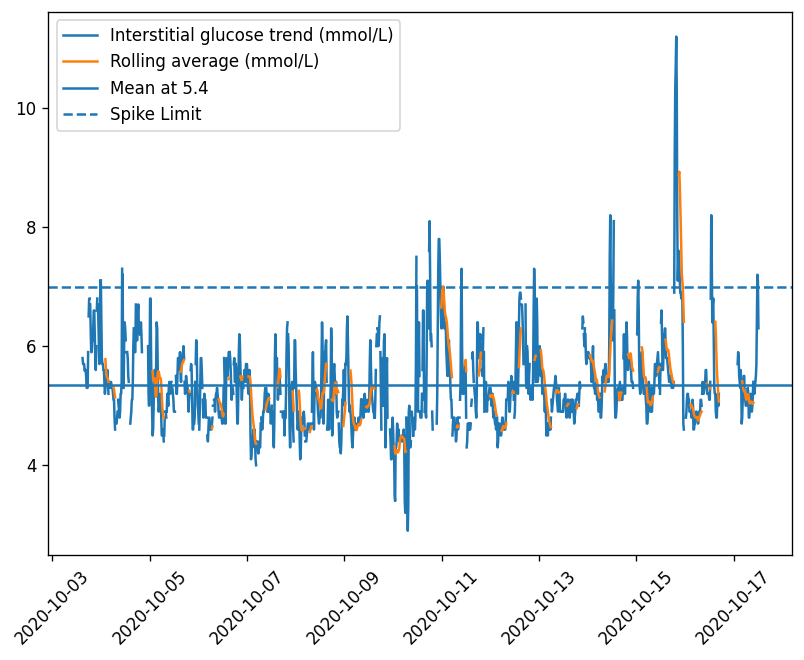

In [4]:
gl.plot_glucose_summary(df)

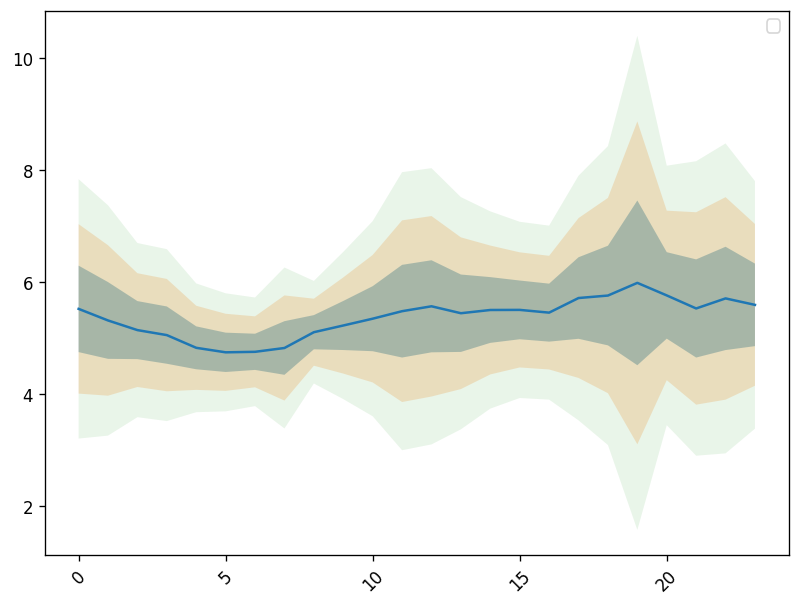

In [5]:
gl.plot_glucose_perc(df)

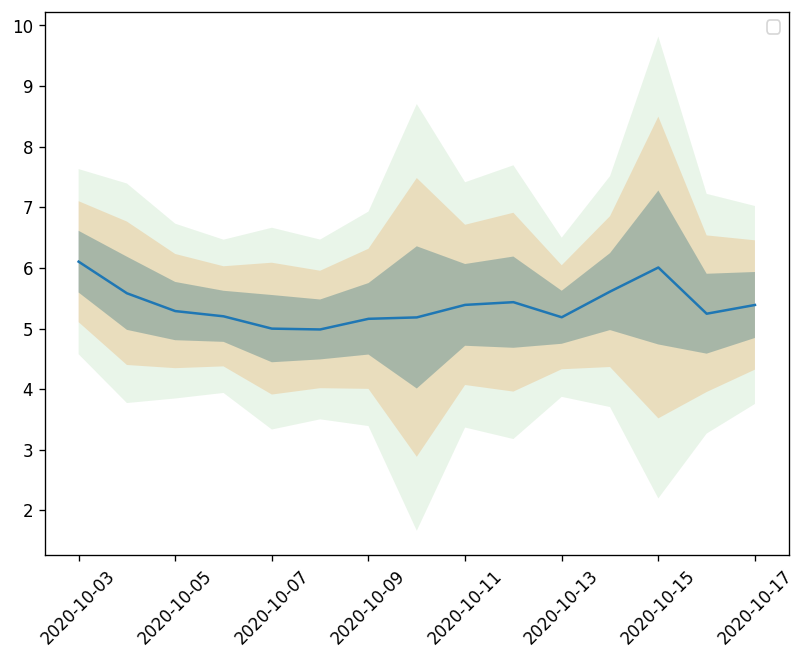

In [6]:
gl.plot_glucose_perc(df, glbl=gl.G_LBL, group_lbl=gl.DAT_LBL)

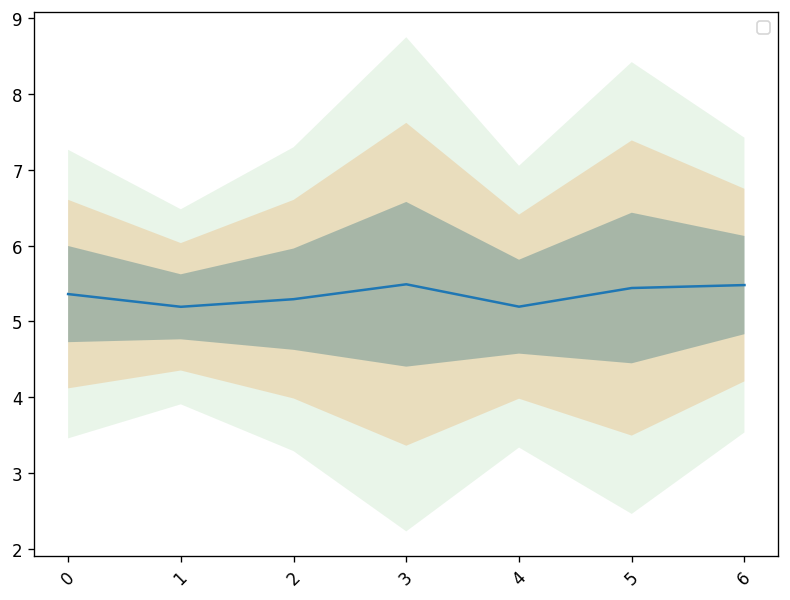

In [7]:
gl.plot_glucose_perc(df, glbl=gl.G_LBL, group_lbl='dayofweek')

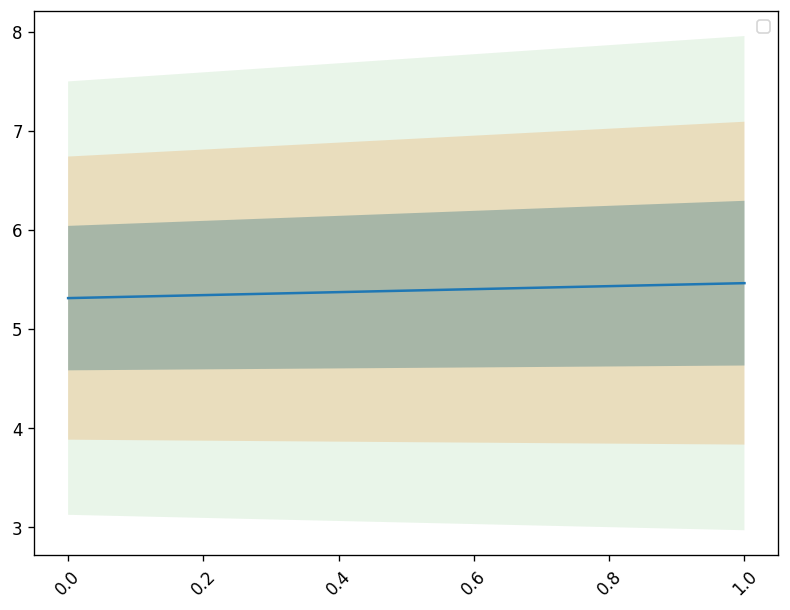

In [8]:
gl.plot_glucose_perc(df, glbl=gl.G_LBL, group_lbl='weekend')

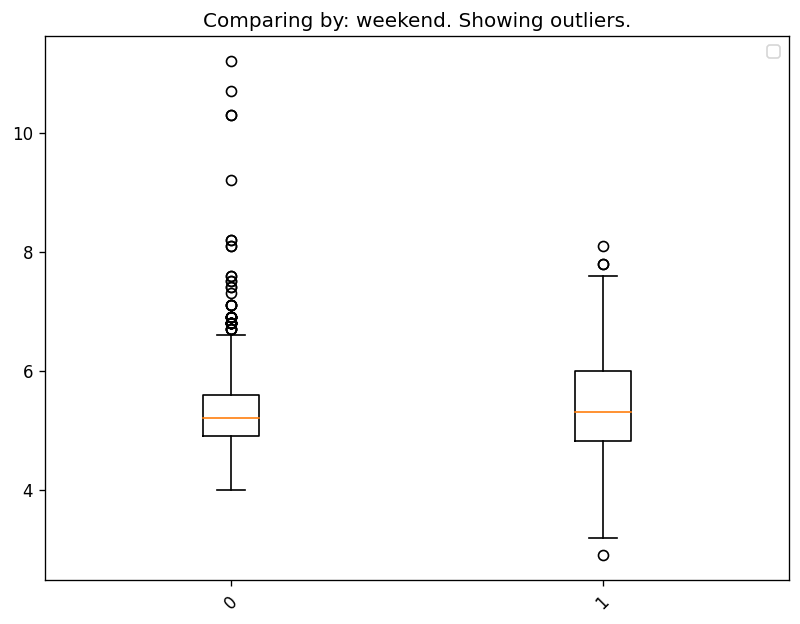

In [9]:
gl.plot_box_compare(df, outliers=True)

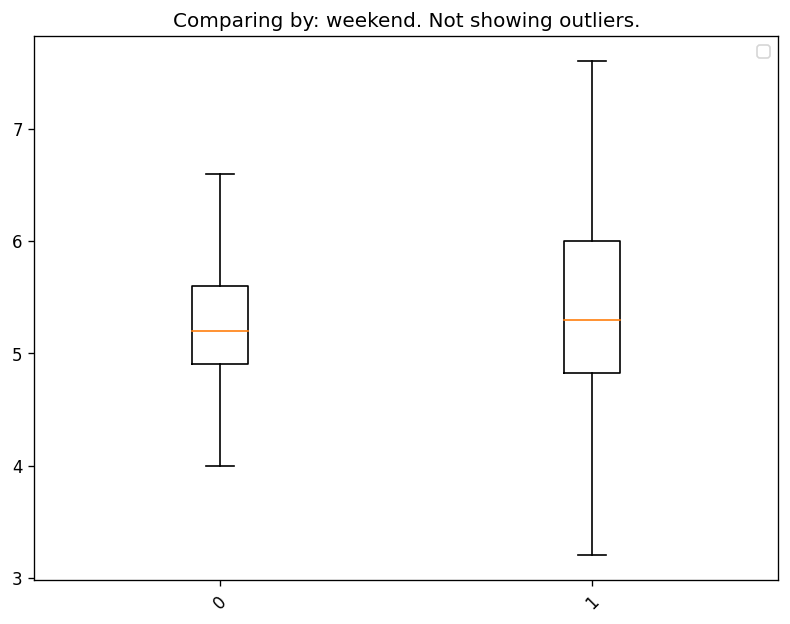

In [10]:
gl.plot_box_compare(df)

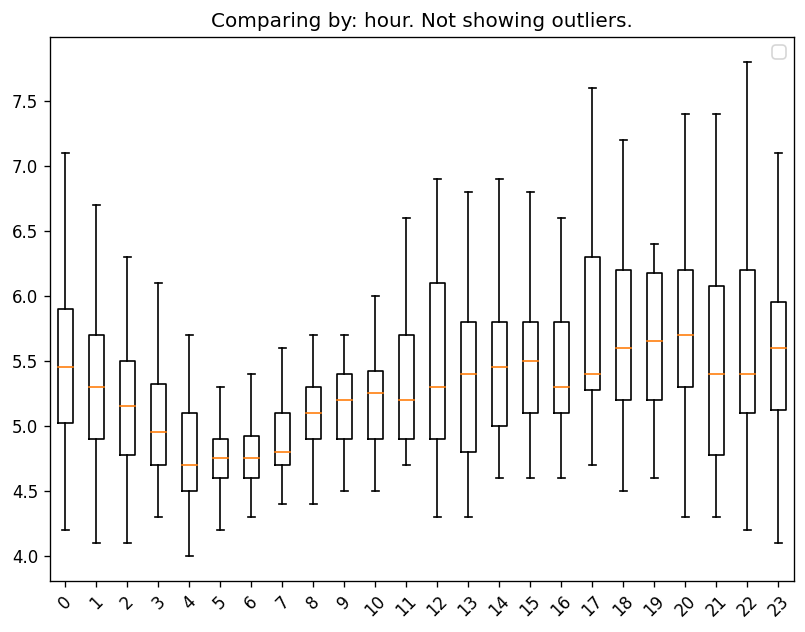

In [11]:
gl.plot_box_compare(df, compare_by='hour')

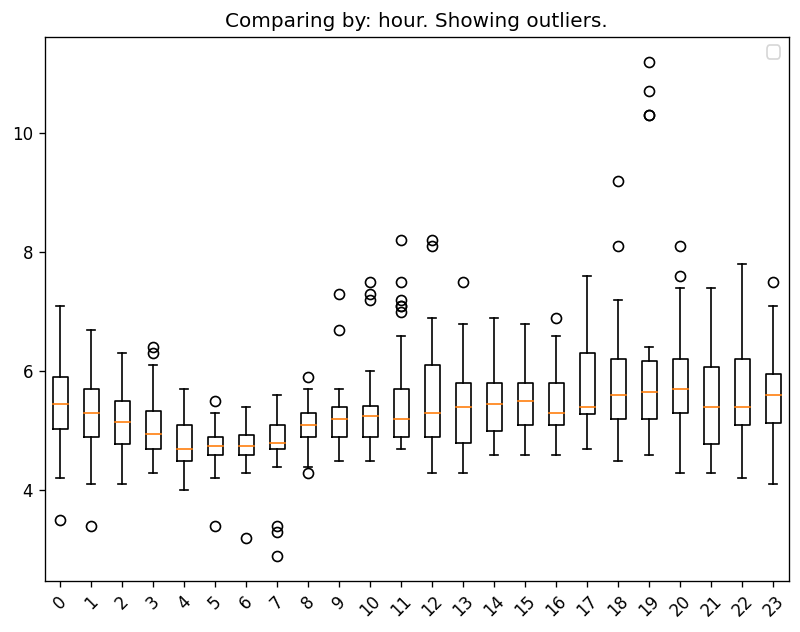

In [12]:
gl.plot_box_compare(df, compare_by='hour', outliers=True)

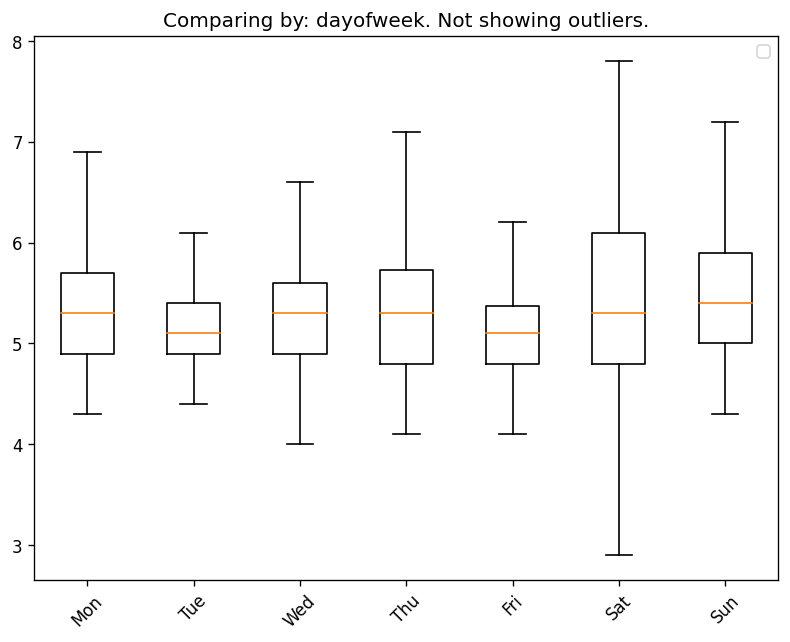

In [13]:
weekday_map = {0:'Mon', 1:'Tue', 2:'Wed', 3:'Thu', 4:'Fri', 5:'Sat', 6:'Sun'}
fn = lambda x: [weekday_map[i] for i in x]
gl.plot_box_compare(df, compare_by='dayofweek', label_map=fn)

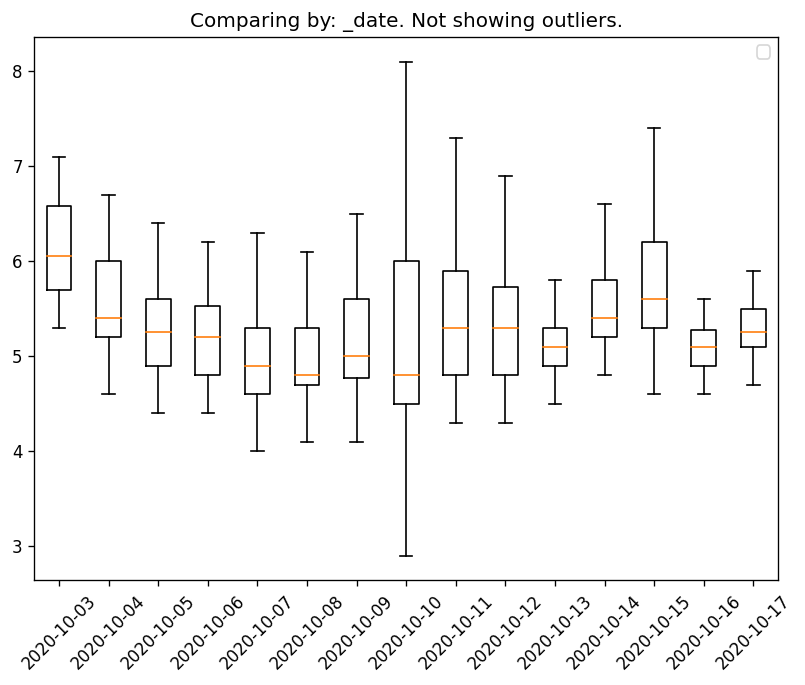

In [14]:
gl.plot_box_compare(df, compare_by='_date')

In [15]:
first_week = df.loc[:'2020-10-9']
second_week = df.loc['2020-10-10':]

# Meals

In [16]:
meals = gl.get_indexed_meals('data/photos_johan/', 'idx')

In [76]:
df

,Device,Serial Number,Device Timestamp,Record Type,Historic Glucose mmol/L,Scan Glucose mmol/L,Non-numeric Rapid-Acting Insulin,Rapid-Acting Insulin (units),Non-numeric Food,Carbohydrates (grams),...,Ketone mmol/L,Meal Insulin (units),Correction Insulin (units),User Change Insulin (units),_date,hour,dayofweek,weekday,weekend,tid
dtime,,,,,,,,,,,,,,,,,,,,,
2020-10-03 13:36:00,FreeStyle LibreLink,b657a541-5134-401b-bd5d-2b48bf6dd42e,03-10-2020 13:36,6,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2020-10-03,13,5,Sat,1,2020-10-03 13:36:00
2020-10-03 14:38:00,FreeStyle LibreLink,b657a541-5134-401b-bd5d-2b48bf6dd42e,03-10-2020 14:38,0,6.1,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2020-10-03,14,5,Sat,1,2020-10-03 14:38:00
2020-10-03 14:40:00,FreeStyle LibreLink,b657a541-5134-401b-bd5d-2b48bf6dd42e,03-10-2020 14:40,6,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2020-10-03,14,5,Sat,1,2020-10-03 14:40:00
2020-10-03 14:40:00,FreeStyle LibreLink,b657a541-5134-401b-bd5d-2b48bf6dd42e,03-10-2020 14:40,1,NaN,5.8,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2020-10-03,14,5,Sat,1,2020-10-03 14:40:00
2020-10-03 14:40:00,FreeStyle LibreLink,b657a541-5134-401b-bd5d-2b48bf6dd42e,03-10-2020 14:40,1,NaN,5.8,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2020-10-03,14,5,Sat,1,2020-10-03 14:40:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-10-17 11:59:00,FreeStyle LibreLink,b657a541-5134-401b-bd5d-2b48bf6dd42e,17-10-2020 11:59,0,7.1,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2020-10-17,11,5,Sat,1,2020-10-17 11:59:00
2020-10-17 12:14:00,FreeStyle LibreLink,b657a541-5134-401b-bd5d-2b48bf6dd42e,17-10-2020 12:14,0,6.3,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2020-10-17,12,5,Sat,1,2020-10-17 12:14:00
2020-10-17 12:16:00,FreeStyle LibreLink,b657a541-5134-401b-bd5d-2b48bf6dd42e,17-10-2020 12:16,1,NaN,5.7,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2020-10-17,12,5,Sat,1,2020-10-17 12:16:00


In [17]:
meals_byname = meals.set_index('filename')
meals_byname['file'] = meals_byname.index

In [18]:
from matplotlib import pyplot as plt
from datetime import datetime as dt
from datetime import timedelta as td
import numpy as np
import pandas as pd

In [19]:
def nearest(df, pivot):
    items = list(df.index)
    n = items.copy()
    for i in range(100):
        
        m = min(n, key=lambda x: abs(x - pivot))
        if pd.isna(df.loc[m][gl.G_LBL]):
            n.remove(m)
        else:
            return m

In [22]:
nearest(df, xmin)

Timestamp('2020-10-08 12:15:00')

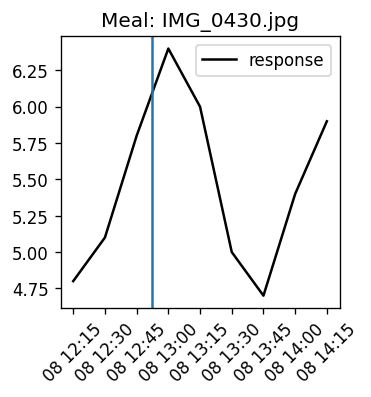

In [21]:
M = 'IMG_0430.jpg'
meal = meals_byname.loc[M]

xmin= meal.ctime-td(minutes=30)
nmin = nearest(df, xmin)
xmax= meal.ctime+td(minutes=90)
nmax = nearest(df, xmax)
gl.start_plot(3,3)

plt.plot(df.loc[nmin:nmax][gl.G_LBL], label='response', color='black')
plt.title('Meal: {}'.format(M))
plt.axvline(x=meal.ctime)
gl.end_plot()

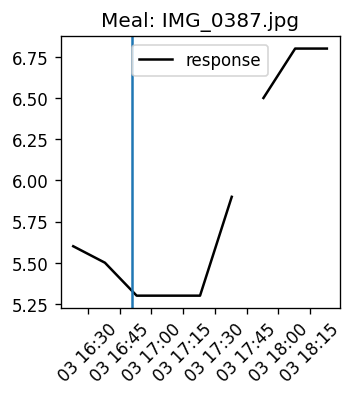

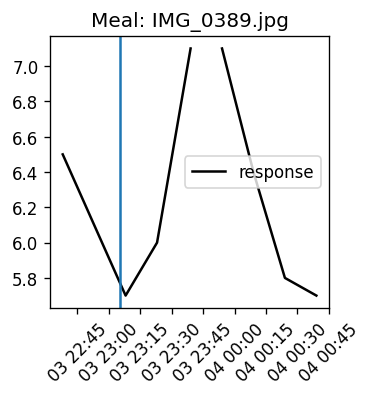

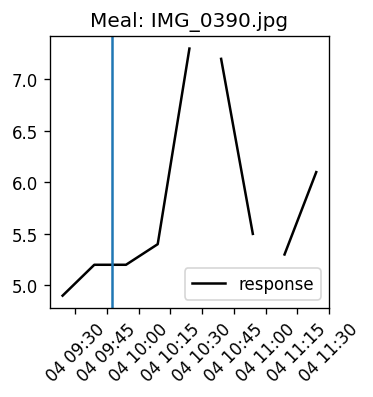

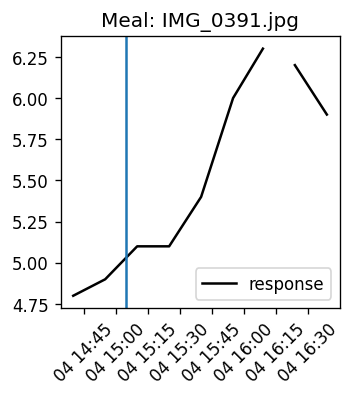

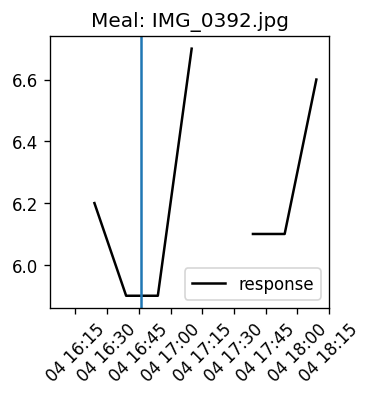

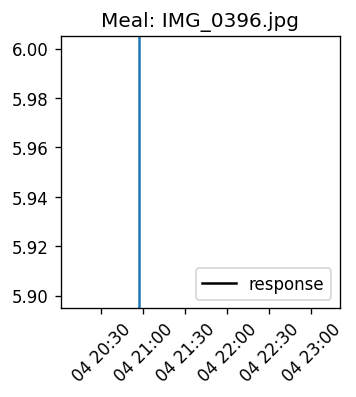

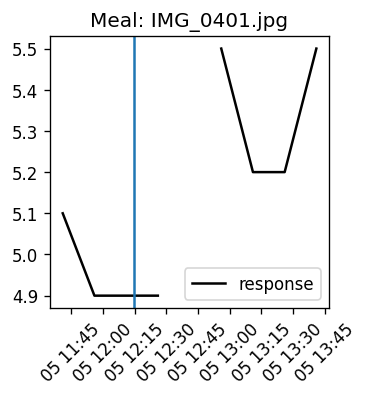

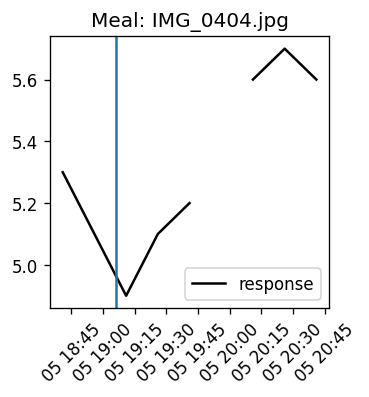

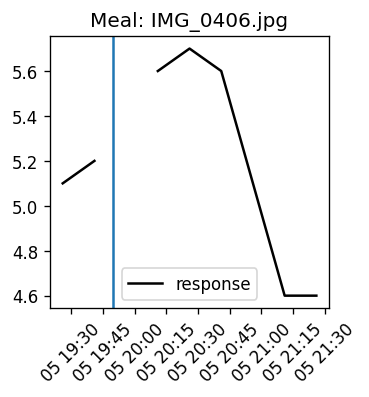

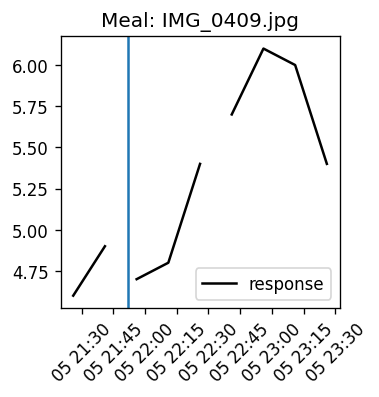

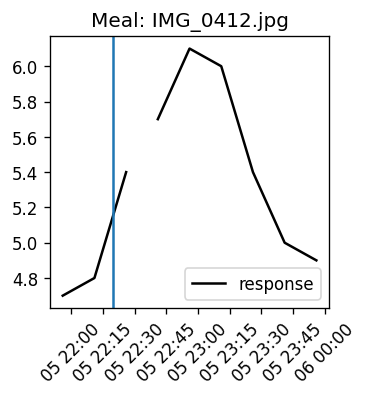

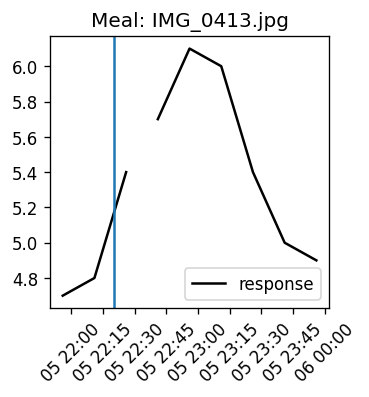

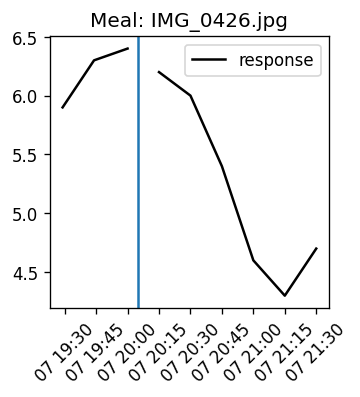

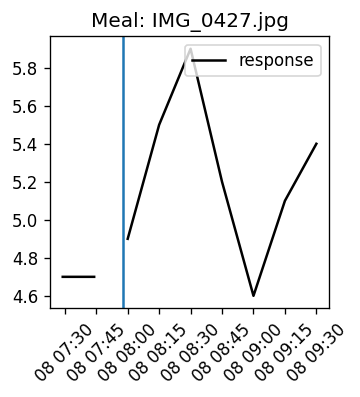

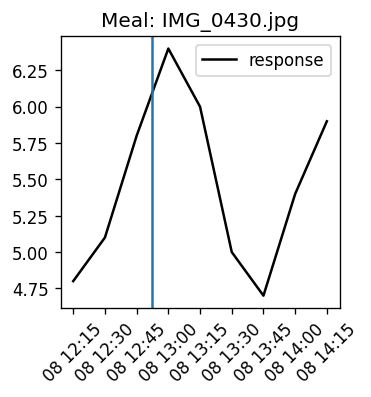

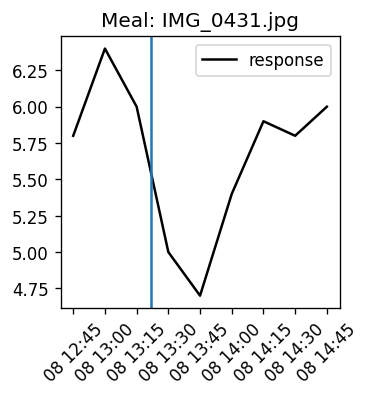

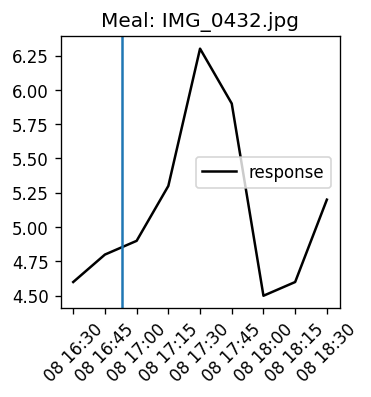

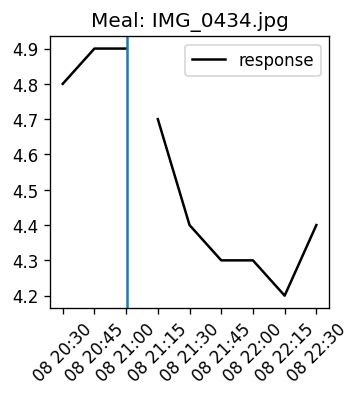

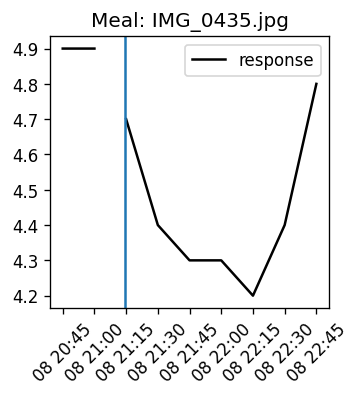

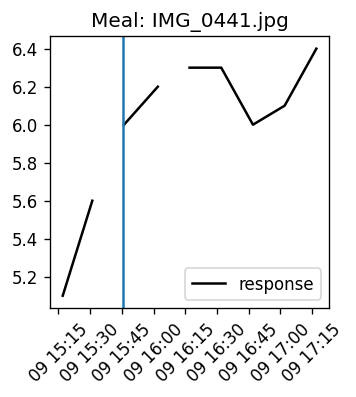

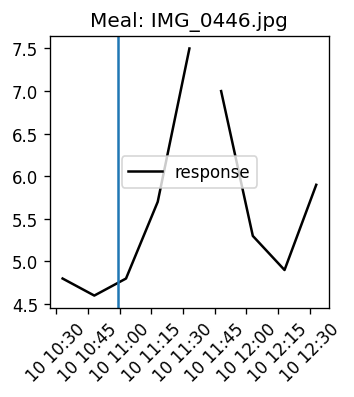

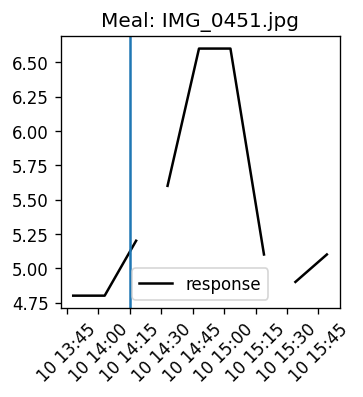

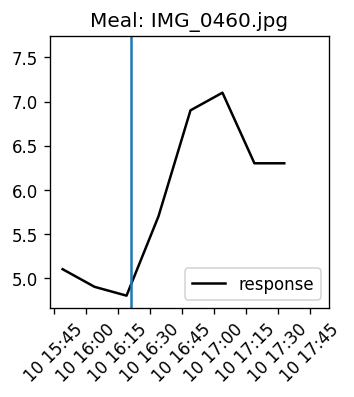

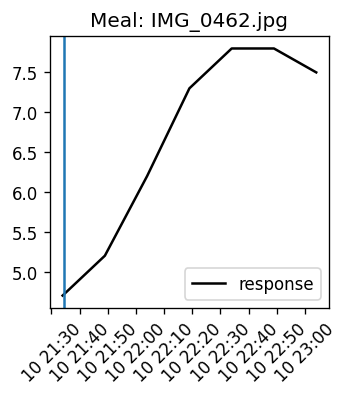

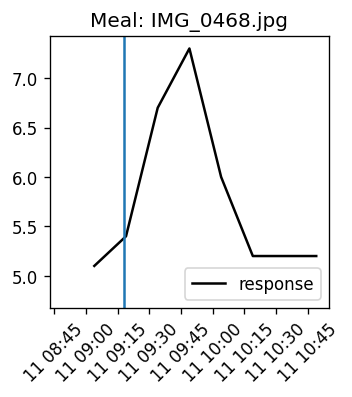

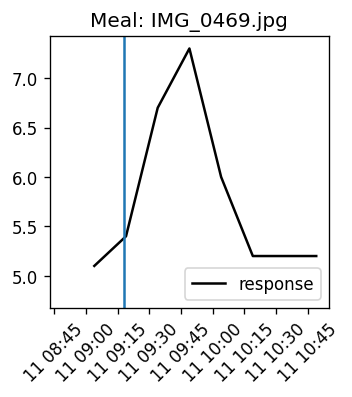

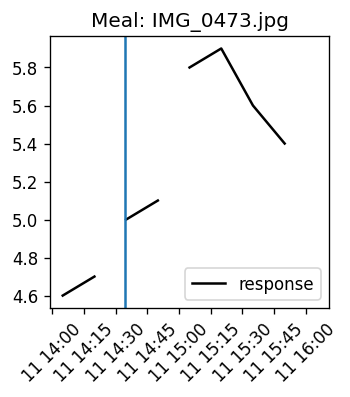

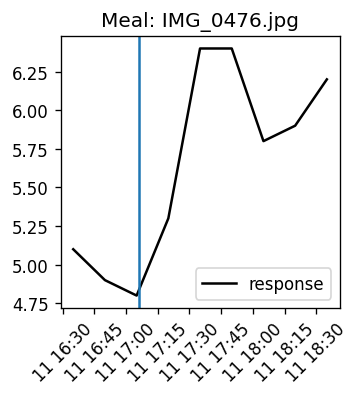

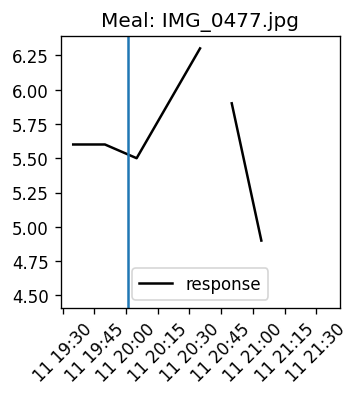

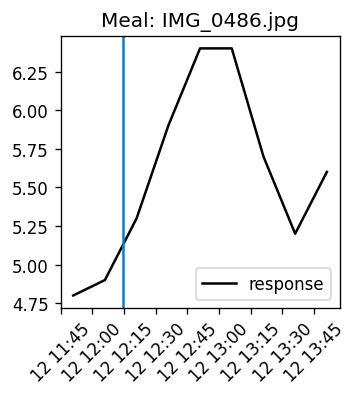

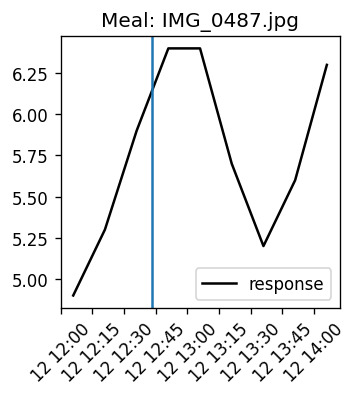

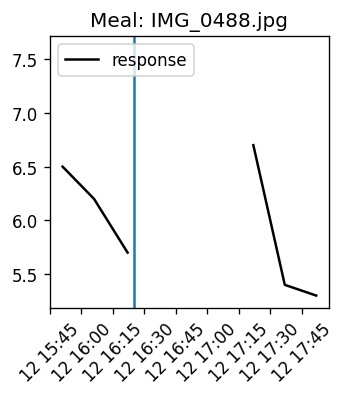

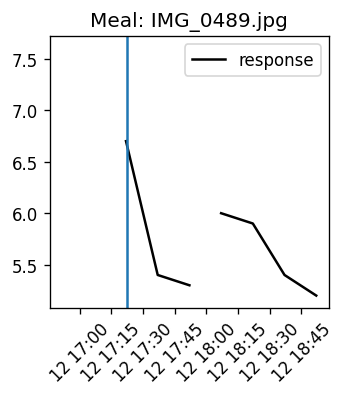

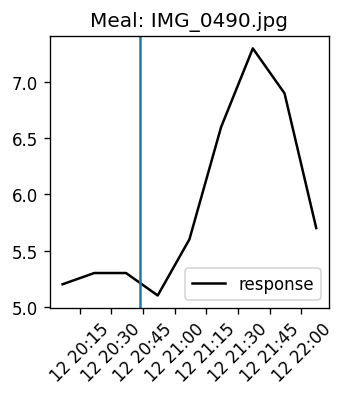

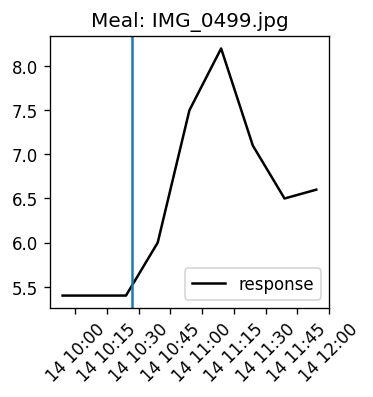

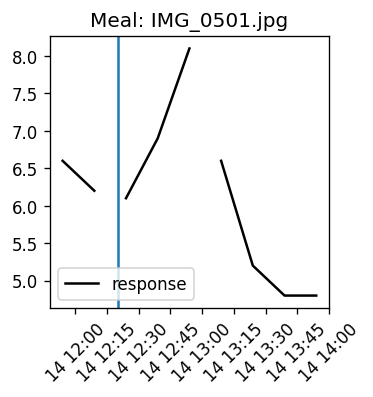

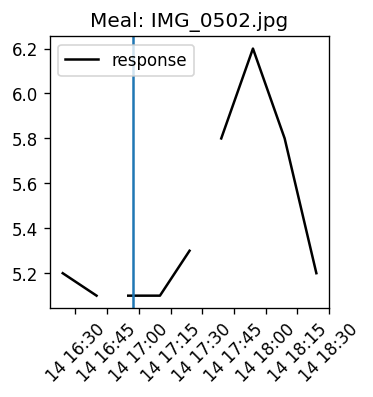

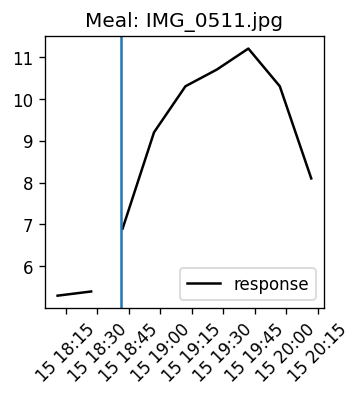

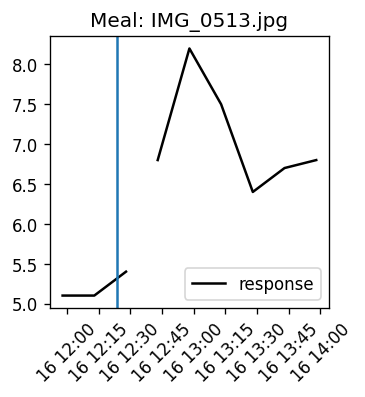

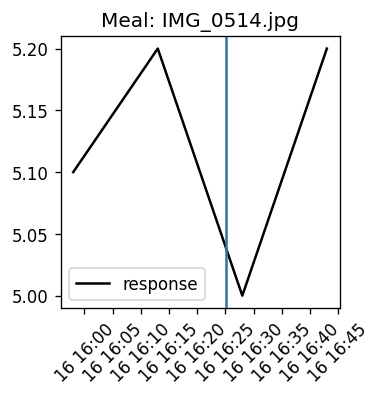

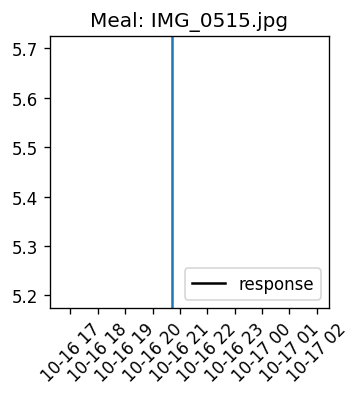

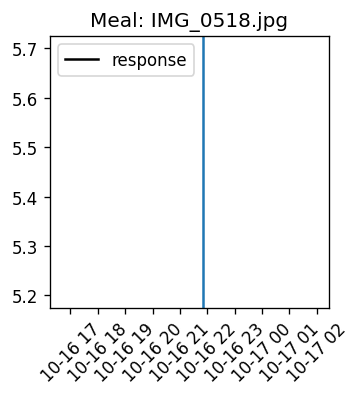

In [23]:
for M in meals.filename:
    meal = meals_byname.loc[M]

    xmin= meal.ctime-td(minutes=30)
    nmin = nearest(df, xmin)
    xmax= meal.ctime+td(minutes=90)
    nmax = nearest(df, xmax)
    gl.start_plot(3,3)

    plt.plot(df.loc[nmin:nmax][gl.G_LBL], label='response', color='black')
    plt.title('Meal: {}'.format(M))
    plt.axvline(x=meal.ctime)
    gl.end_plot()

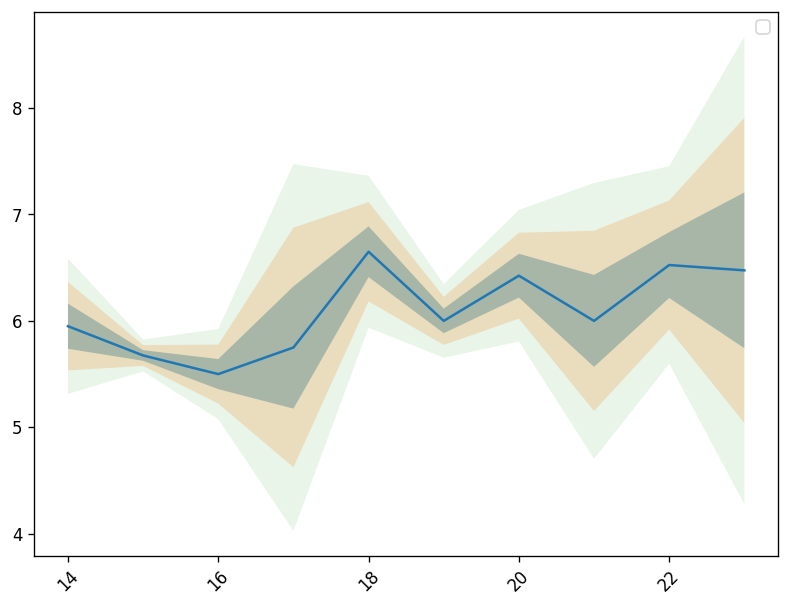

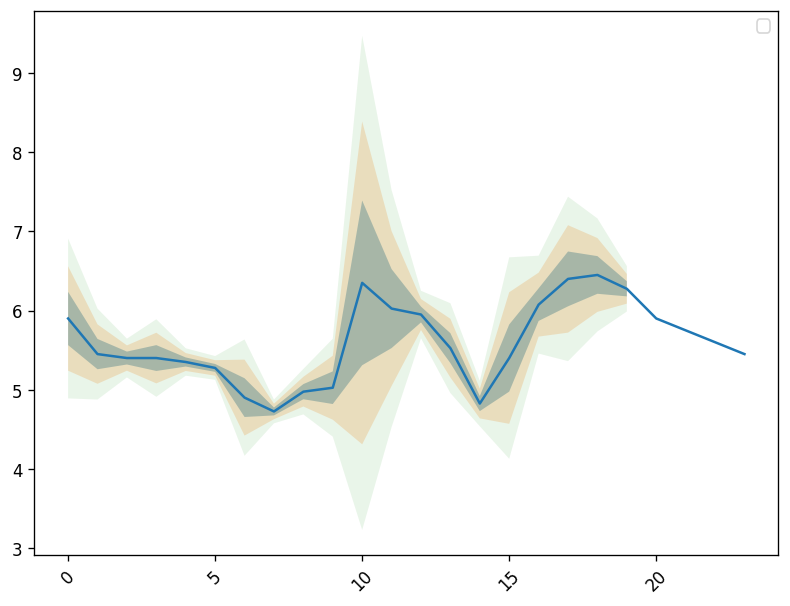

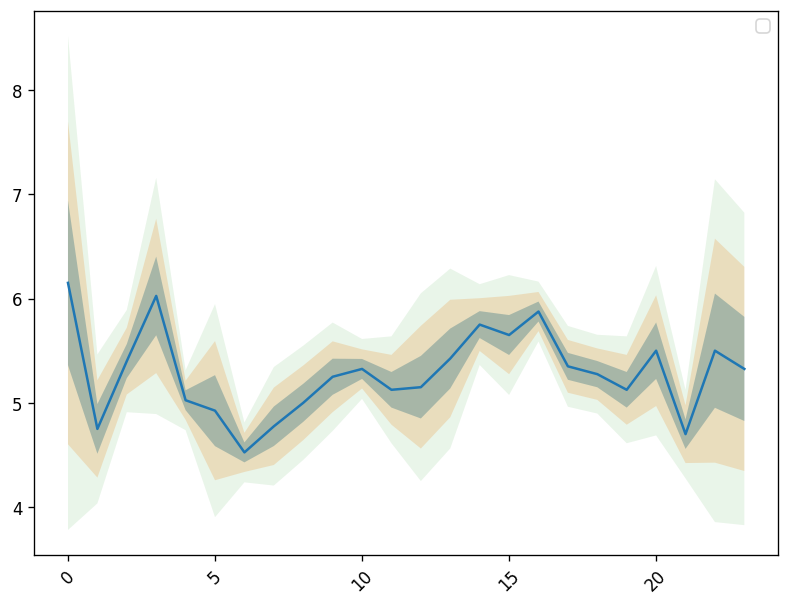

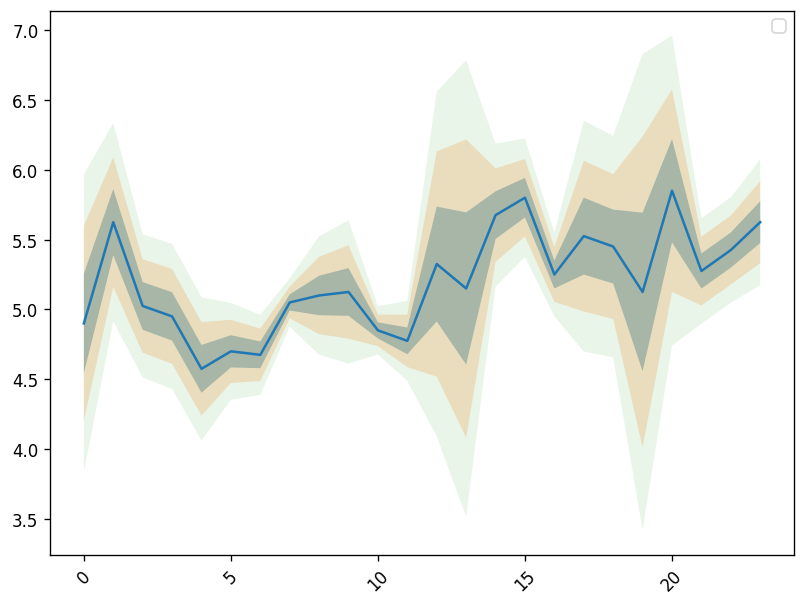

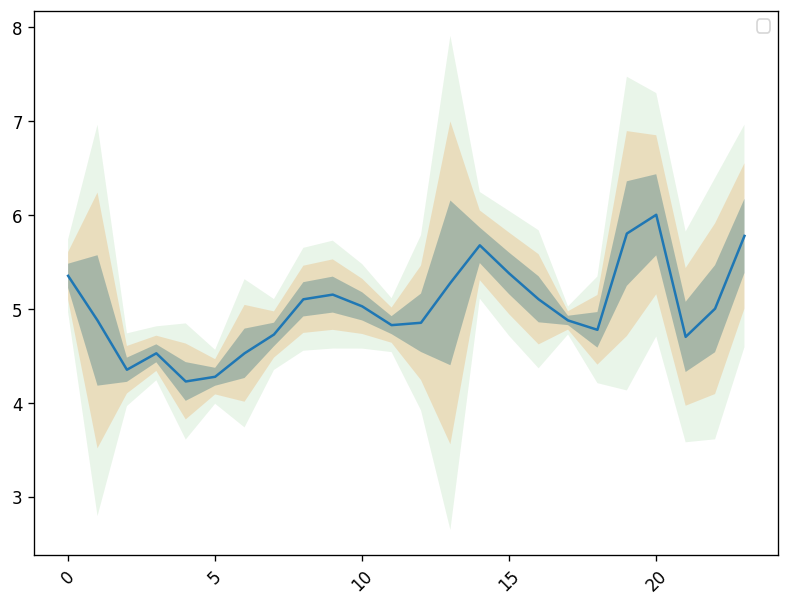

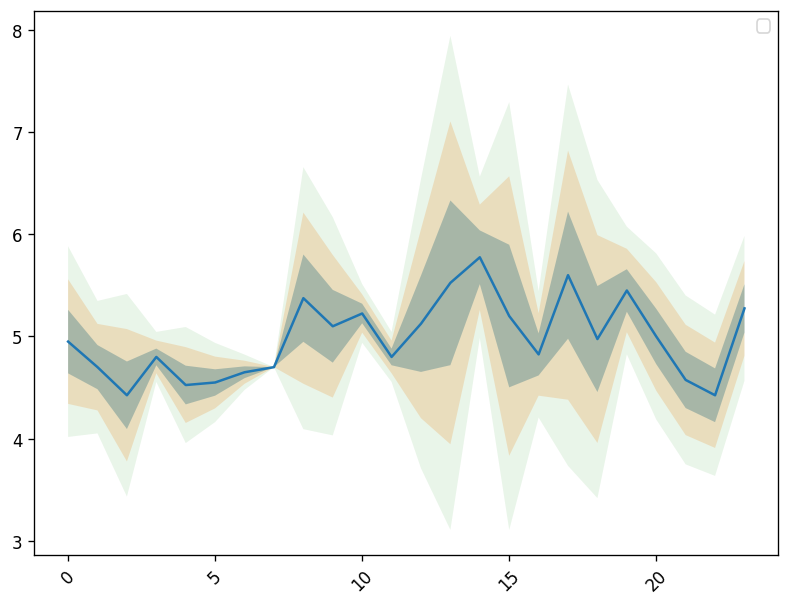

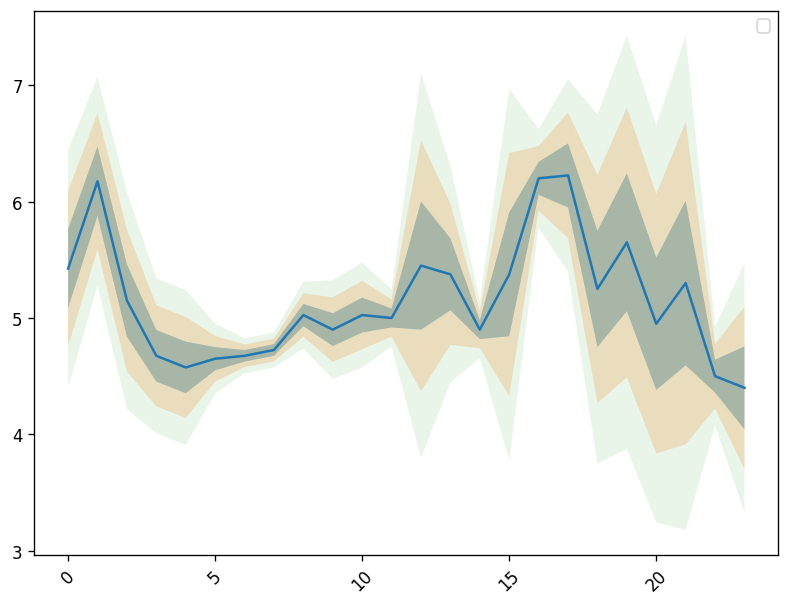

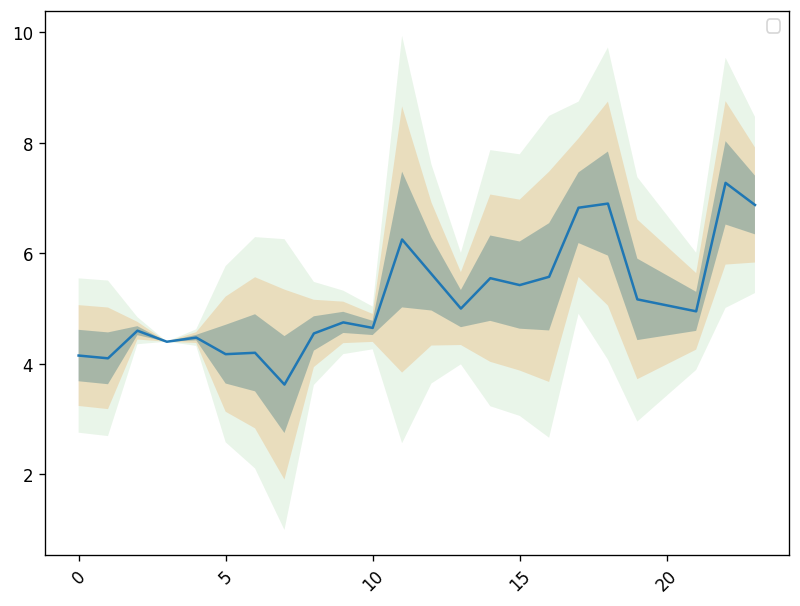

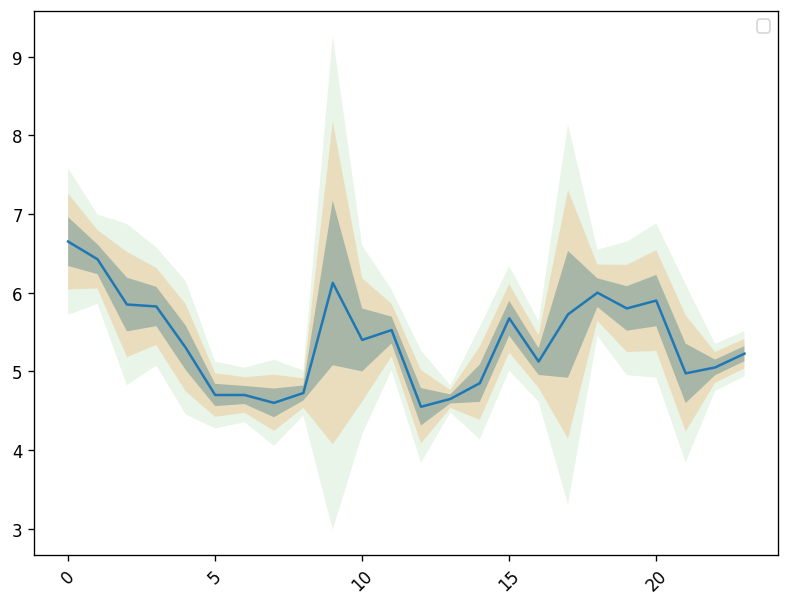

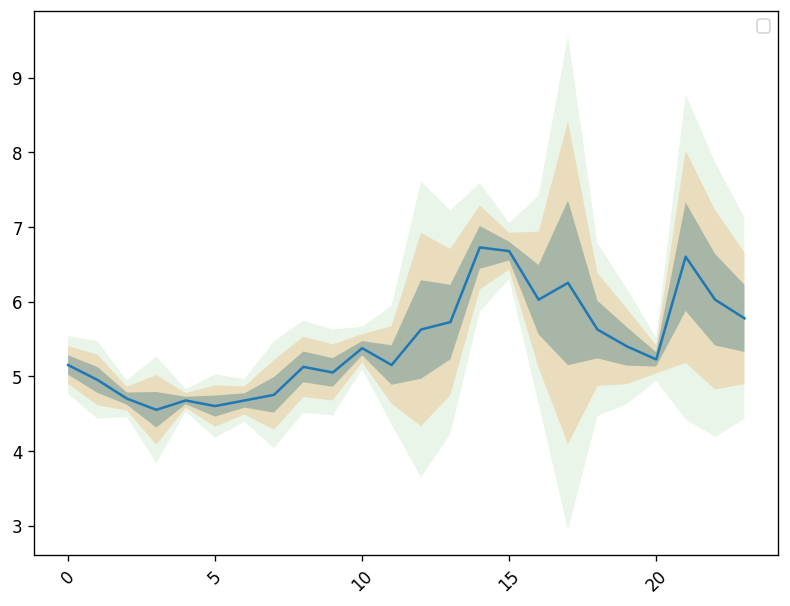

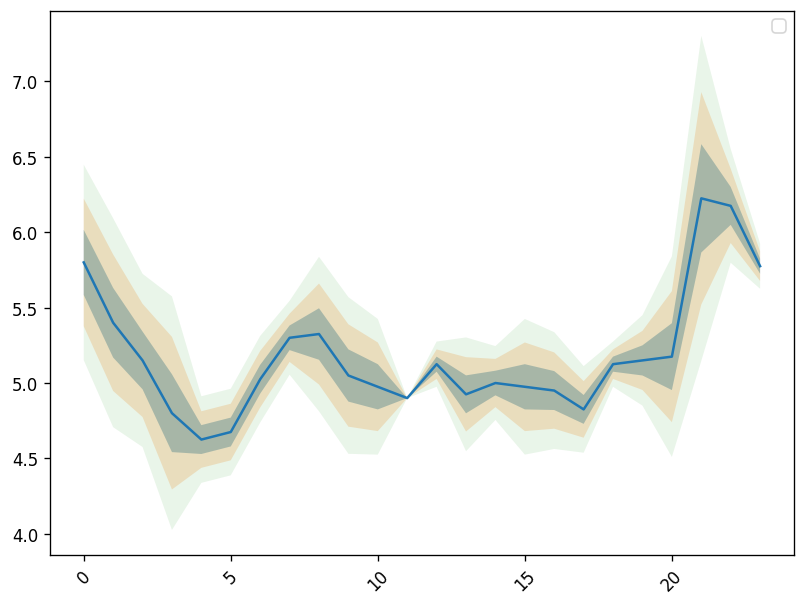

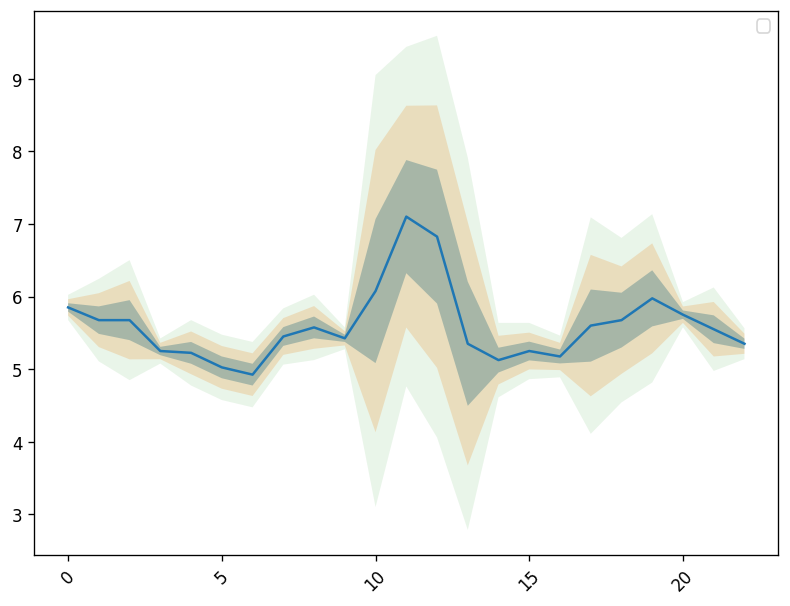

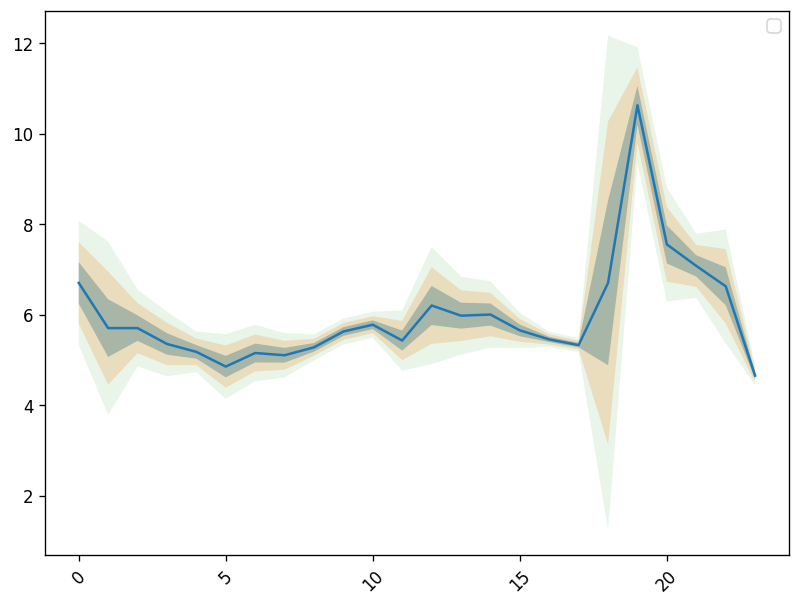

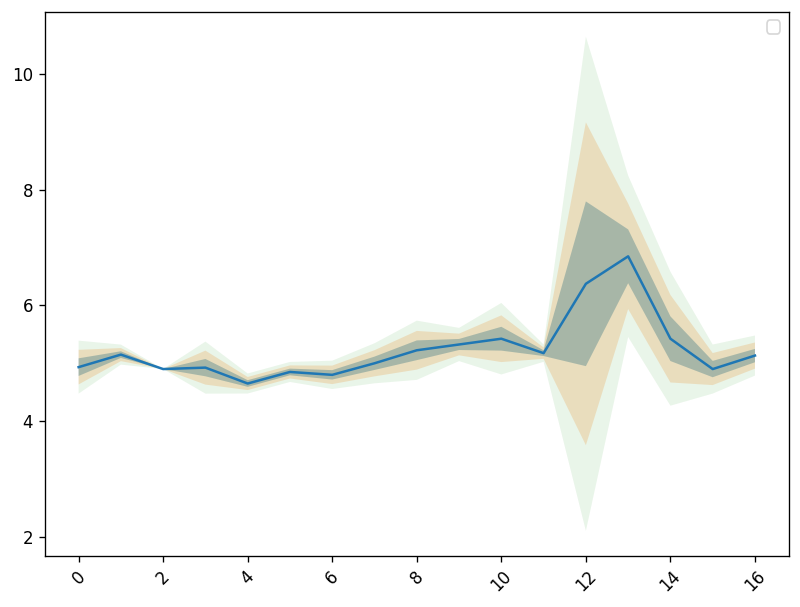

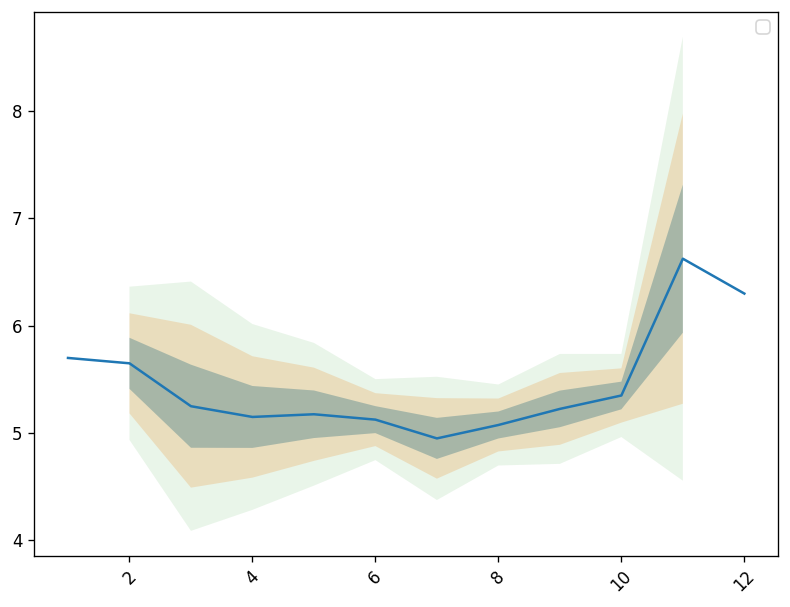

In [193]:
for x in df._date.unique():
    gl.plot_glucose_perc(df.loc[x.strftime('%Y-%m-%d')])

In [6]:
# Set Drivative
df['dg'] = df[gl.G_LBL].diff()
df['dt'] = df['tid'].diff().dt.total_seconds()
df['dg_dt']=df.dg/df.dt
mdf['dg'] = mdf[gl.G_LBL].diff()
mdf['dt'] = mdf['tid'].diff().dt.total_seconds()
mdf['dg_dt']=mdf.dg/mdf.dt


In [24]:

def set_derivative(df, tlbl='tid', glbl=gl.G_LBL):
    df['dg'] = df[glbl].diff()
    df['dt'] = df[tlbl].diff().dt.total_seconds()
    df['dg_dt'] = df.dg / df.dt
    return df

In [26]:
df.columns

Index(['Device', 'Serial Number', 'Device Timestamp', 'Record Type',
       'Historic Glucose mmol/L', 'Scan Glucose mmol/L',
       'Non-numeric Rapid-Acting Insulin', 'Rapid-Acting Insulin (units)',
       'Non-numeric Food', 'Carbohydrates (grams)', 'Carbohydrates (servings)',
       'Non-numeric Long-Acting Insulin', 'Long-Acting Insulin Value (units)',
       'Notes', 'Strip Glucose mmol/L', 'Ketone mmol/L',
       'Meal Insulin (units)', 'Correction Insulin (units)',
       'User Change Insulin (units)', '_date', 'hour', 'dayofweek', 'weekday',
       'weekend', 'tid', 'dg', 'dt', 'dg_dt'],
      dtype='object')

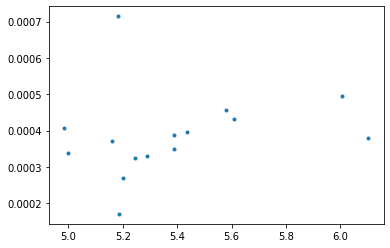

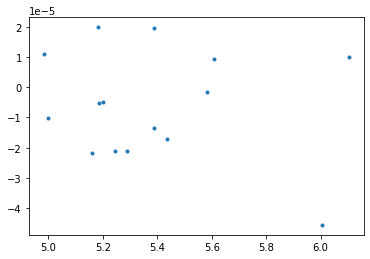

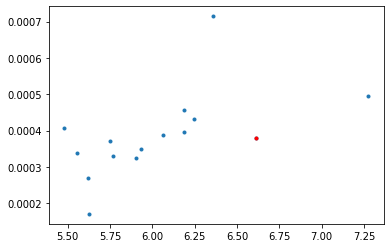

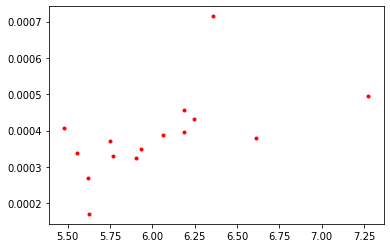

In [50]:
set_derivative(df)
d=df
G = '_date'
x = d.groupby([G])[gl.G_LBL].mean()
y = d.groupby([G])['dg_dt'].mean() + d.groupby([G])['dg_dt'].std()
plt.plot(x, y, linestyle='none', marker='.')
plt.show()
x = d.groupby([G])[gl.G_LBL].mean()
y = d.groupby([G])['dg_dt'].mean()
plt.plot(x, y, linestyle='none', marker='.')
plt.show()

x = d.groupby([G])[gl.G_LBL].mean() +  d.groupby([G])[gl.G_LBL].std()
y = d.groupby([G])['dg_dt'].mean() + d.groupby([G])['dg_dt'].std()
plt.plot(x, y, linestyle='none', marker='.')
d=df.loc['2020-10-03']
x = d.groupby([G])[gl.G_LBL].mean() +  d.groupby([G])[gl.G_LBL].std()
y = d.groupby([G])['dg_dt'].mean() + d.groupby([G])['dg_dt'].std()
plt.plot(x, y, linestyle='none', marker='.', color='red')
plt.show()
d=df
x = d.groupby([G])[gl.G_LBL].mean() +  d.groupby([G])[gl.G_LBL].std()
y = d.groupby([G])['dg_dt'].mean() + d.groupby([G])['dg_dt'].std()
plt.plot(x, y, linestyle='none', marker='.', color='red')
plt.show()

In [54]:
y.sort_values(ascending=False)
x.sort_values(ascending=False)

_date
2020-10-15    7.276320
2020-10-03    6.611731
2020-10-10    6.356354
2020-10-14    6.243764
2020-10-12    6.187030
2020-10-04    6.184835
2020-10-11    6.064000
2020-10-17    5.932334
2020-10-16    5.903106
2020-10-05    5.768125
2020-10-09    5.749448
2020-10-13    5.623109
2020-10-06    5.622442
2020-10-07    5.552700
2020-10-08    5.478500
Name: Historic Glucose mmol/L, dtype: float64

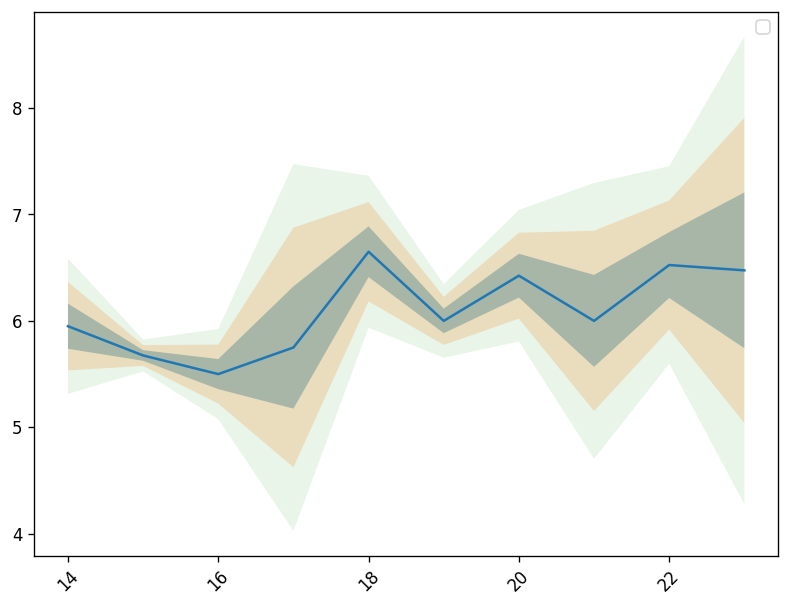

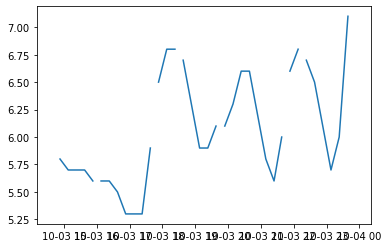

In [47]:
D = df.loc['2020-10-03']
gl.plot_glucose_perc(D)
plt.plot(D[gl.G_LBL])

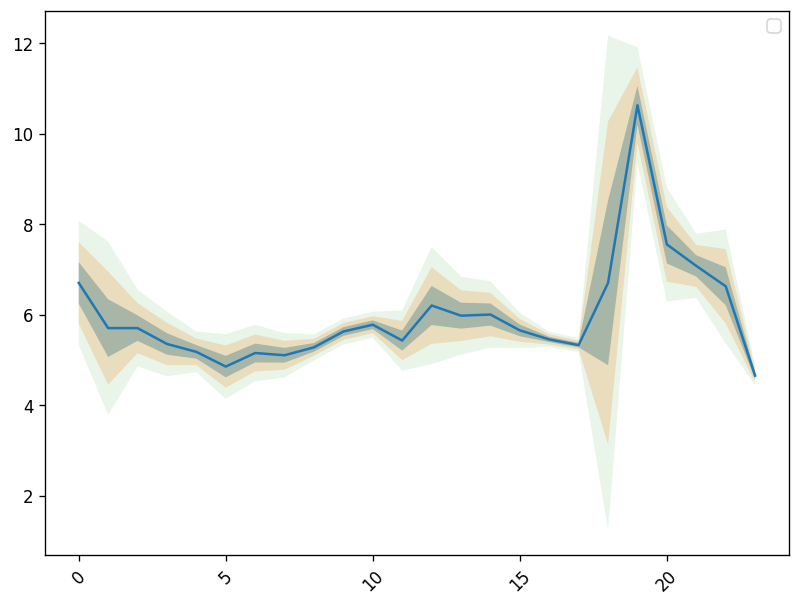

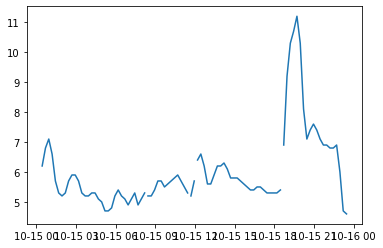

In [34]:
D = df.loc['2020-10-15']
gl.plot_glucose_perc(D)
plt.plot(D[gl.G_LBL])

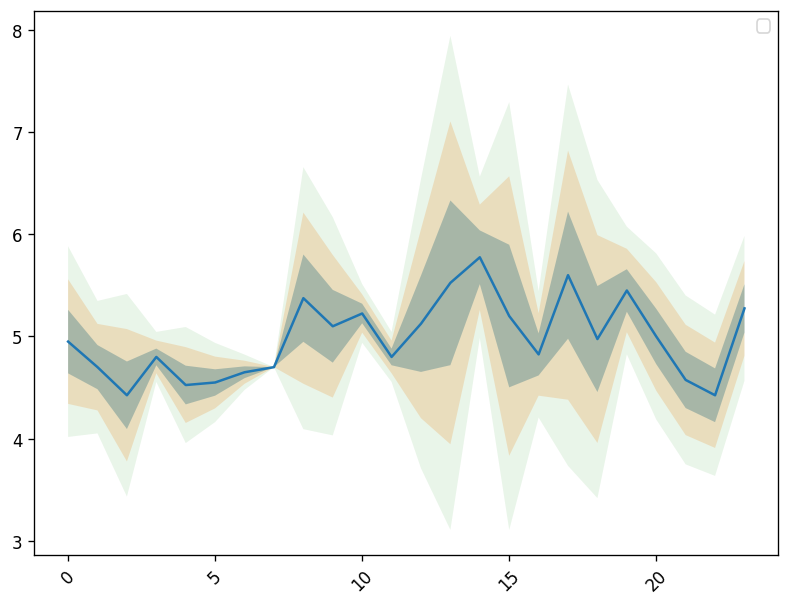

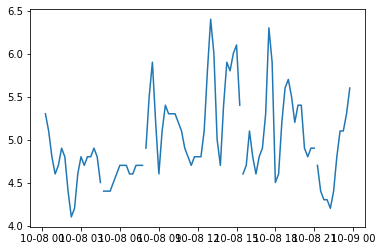

In [55]:
D = df.loc['2020-10-08']
gl.plot_glucose_perc(D)
plt.plot(D[gl.G_LBL])

In [55]:
df.sort_index().index

DatetimeIndex(['2020-10-03 13:36:00', '2020-10-03 14:38:00',
               '2020-10-03 14:40:00', '2020-10-03 14:40:00',
               '2020-10-03 14:40:00', '2020-10-03 14:53:00',
               '2020-10-03 15:08:00', '2020-10-03 15:23:00',
               '2020-10-03 15:38:00', '2020-10-03 15:53:00',
               ...
               '2020-10-17 10:44:00', '2020-10-17 10:59:00',
               '2020-10-17 11:14:00', '2020-10-17 11:29:00',
               '2020-10-17 11:44:00', '2020-10-17 11:59:00',
               '2020-10-17 12:14:00', '2020-10-17 12:16:00',
               '2020-10-17 12:39:00', '2020-10-17 12:43:00'],
              dtype='datetime64[ns]', name='dtime', length=1450, freq=None)

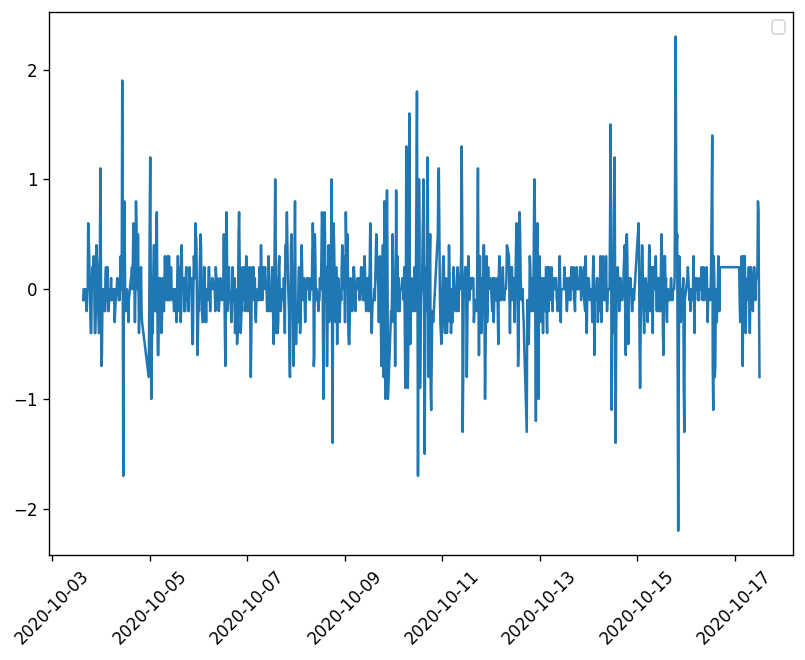

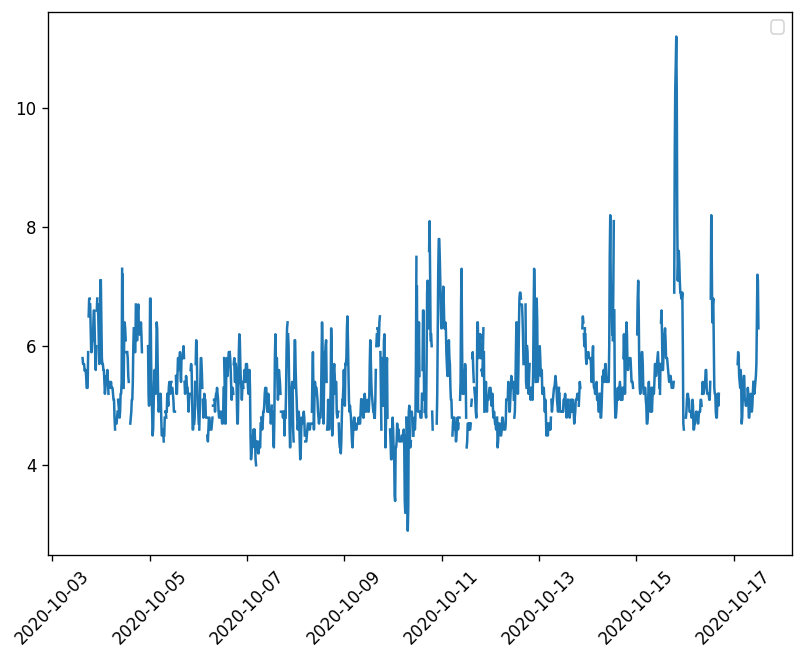

In [21]:
#D = df.loc['2020-10-04']
D = df
gl.start_plot()
plt.plot((D[lb].diff()).dropna())
gl.end_plot()
gl.start_plot()
plt.plot(D[lb])
gl.end_plot()

In [208]:
D[tlbl].diff()

dtime
2020-10-03 14:38:00      NaT
2020-10-03 14:53:00   0 days
2020-10-03 15:08:00   0 days
2020-10-03 15:23:00   0 days
2020-10-03 15:38:00   0 days
                       ...  
2020-10-10 06:30:00   1 days
2020-10-11 12:16:00   1 days
2020-10-14 17:36:00   3 days
2020-10-15 11:39:00   1 days
2020-10-15 11:39:00   0 days
Name: _date, Length: 1450, dtype: timedelta64[ns]

# Sessionizer

````
-----|---30m---|---30m---|-----------1h30m-------|---30m---|---30m---|--------
    event    event      event                  event     event     event
```
* 2 meals, 3events each



```
-----|---------1h--------|----------1h30m--------|--------2h---------|--------
    event              event                  event                event
```
* 3 meals, 2 events first, then 1 event each

```
-----|-10m-|------40m------|-----------1h30m-----|---30m---|---30m---|--------
    event                event                  event     event     event
```
* 2 meals, 2 events first, then 3 events

In [71]:
session_len_s = 2*60*60

In [72]:
meals.sort_index(inplace=True)
meals['dt'] = meals.ctime.diff().dt.total_seconds() 
meals['session_start'] = (meals.dt.isnull()) | (meals.dt > session_len_s)
meals['meal_id'] = meals[meals['session_start']].ctime.rank(method='first').astype(int)
meals['meal_id'] = meals['meal_id'].fillna(method='ffill').astype(int)

In [73]:
meals

,day,hour,minute,time_fmt,time_str,ctime,cdate,filename,dt,session_start,meal_id
idx,,,,,,,,,,,
2020-10-03 16:50:36,3,16,50,1650,16:50,2020-10-03 16:50:36,2020-10-03,IMG_0387.jpg,NaN,True,1
2020-10-03 23:05:18,3,23,5,2305,23:5,2020-10-03 23:05:18,2020-10-03,IMG_0389.jpg,22482.0,True,2
2020-10-04 09:47:14,4,9,47,947,9:47,2020-10-04 09:47:14,2020-10-04,IMG_0390.jpg,38516.0,True,3
2020-10-04 15:04:58,4,15,4,1504,15:4,2020-10-04 15:04:58,2020-10-04,IMG_0391.jpg,19064.0,True,4
2020-10-04 16:45:54,4,16,45,1645,16:45,2020-10-04 16:45:54,2020-10-04,IMG_0392.jpg,6056.0,False,4
2020-10-04 20:56:54,4,20,56,2056,20:56,2020-10-04 20:56:54,2020-10-04,IMG_0396.jpg,15060.0,True,5
2020-10-05 12:14:56,5,12,14,1214,12:14,2020-10-05 12:14:56,2020-10-05,IMG_0401.jpg,55082.0,True,6
2020-10-05 19:06:26,5,19,6,1906,19:6,2020-10-05 19:06:26,2020-10-05,IMG_0404.jpg,24690.0,True,7
2020-10-05 19:49:58,5,19,49,1949,19:49,2020-10-05 19:49:58,2020-10-05,IMG_0406.jpg,2612.0,False,7


In [79]:
df.loc[nearest(df, meals.index[0])][gl.G_LBL]

5.3

In [110]:
idf4=mdf.loc['2020':'2020-04-23']
len(idf4._date.unique())

15

In [95]:
idf=mdf.loc['2020-05-19':'2020-06-02']
len(idf._date.unique())

15

In [101]:
idf2=mdf.loc['2019-12-05':'2019-12-19']
idf3=mdf.loc['2020-05-04':'2020-05-18']
len(idf3._date.unique())

15

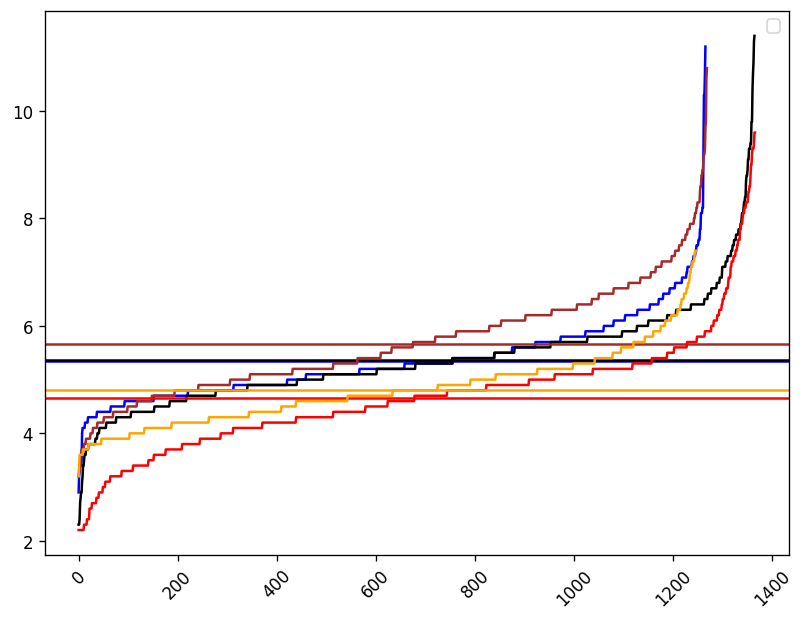

In [116]:
gl.start_plot()
plt.plot(np.array(df.sort_values(gl.G_LBL)[gl.G_LBL]), color='blue')
plt.axhline(y=df[gl.G_LBL].mean(), color='blue')
plt.plot(np.array(idf.sort_values(gl.G_LBL)[gl.G_LBL]), color='black')
plt.axhline(y=idf[gl.G_LBL].mean(), color='black')
plt.plot(np.array(idf2.sort_values(gl.G_LBL)[gl.G_LBL]), color='brown')
plt.axhline(y=idf2[gl.G_LBL].mean(), color='brown')
plt.plot(np.array(idf3.sort_values(gl.G_LBL)[gl.G_LBL]), color='red')
plt.axhline(y=idf3[gl.G_LBL].mean(), color='red')
plt.plot(np.array(idf4.sort_values(gl.G_LBL)[gl.G_LBL]), color='orange')
plt.axhline(y=idf4[gl.G_LBL].mean(), color='orange')
gl.end_plot()

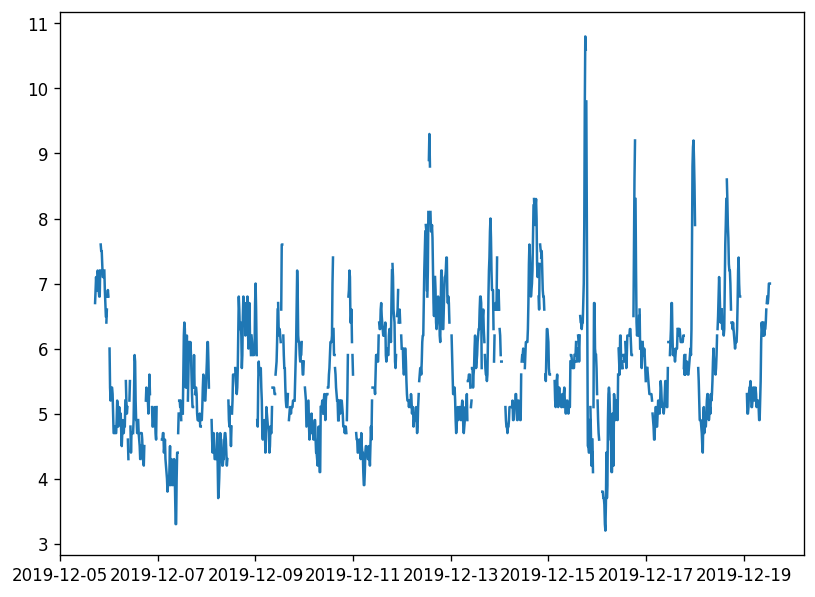

In [105]:
gl.start_plot()
plt.plot(idf2[gl.G_LBL])